### Chapter 01. 데이터 준비와 탐색

- 목표는 농어다.

In [23]:
import csv

# 스트림 개방
f = open('Fish.csv', 'r')
data = csv.reader(f) # f는 고속도로라고 생각하기

header = next(data)

perch_weight = [] # 비어있는 리스트 생성
perch_length = []

for row in data:
    if row[0] == 'Perch':
        # 강제 형 변환 (str -> float)
        row[1] = float(row[1]) # 농어의 무게 
        row[3] = float(row[3]) # 농어의 길이
        
        perch_weight.append(row[1])
        perch_length.append(row[3])
        
    #print(row)

# 스트림 폐쇄 
f.close()
print("농어의 무게(y):", perch_weight)
print("농어의 길이(x):", perch_length)

농어의 무게(y): [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0]
농어의 길이(x): [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]


In [24]:
print(header)

['\ufeffSpecies', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


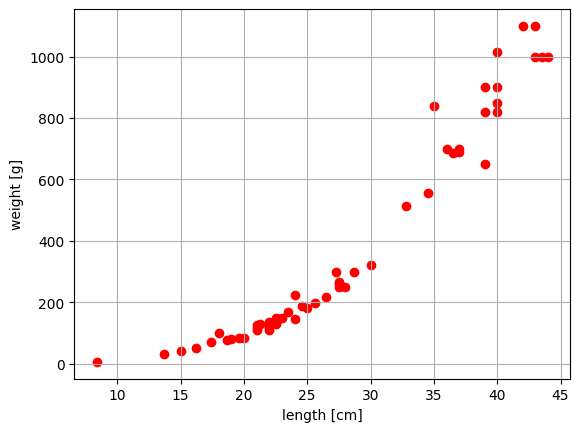

In [25]:
import matplotlib.pyplot as plt # alias = as

# 산점도(scatter plot) 그리기 --> 산포되어 있는 점들의 그림
plt.figure()
plt.scatter(perch_length, perch_weight, c='red') # ([x좌표], [y좌표])
plt.xlabel('length [cm]')
plt.ylabel('weight [g]')
plt.grid(True)
plt.show()

### Chapter 02. 데이터 전처리

In [26]:
import numpy as np # Numerical Python

print('이전:', type(perch_weight))

y = np.array(perch_weight) # ndarray = n-dimensional array (n차원 배열)
x = np.array(perch_length)

print('이후:', type(y))

이전: <class 'list'>
이후: <class 'numpy.ndarray'>


In [27]:
print('x=', x)
print('y=', y)
# 쉼표가 사라진 걸 알 수 있음

x= [ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
y= [   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


In [28]:
print(x.shape)
print(y.shape) # shape: 리스트 안에 원소가 몇 개 있는지 확인

(56,)
(56,)


#### 📌 x랑 y를 학습용 & 시험용 데이터 세트로 분할해야함!
#### **scikit-learn (sklearn)**

> 1) Classification - 분류 
> 2) Regression - 회귀
> 3) Clusturing - 군집화
> 4) Dimensionality Reduction - 차원 축소
> 5) Model Selection - 모델 선택
> 6) Pre.Processing - 전처리

In [29]:
from sklearn.model_selection import train_test_split # 학습용, 시험용으로 쪼개기

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42) 
# random_state 뒤에 붙는 숫자는 결과 고정을 위한 열쇠번호와 같음.

print(x_train)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]


#### **train_test_split**
- test_size=0.25 가 기본적으로 설정되어있기 떄문에 별도의 설정이 없을 경우 25%를 테스트 사이즈로 설정한다.

In [30]:
print(x_train.shape, y_train.shape) # 42개
print(x_test.shape, y_test.shape) # 14개
# 42 : 14 = 3 : 1 --> 75% : 25%

(42,) (42,)
(14,) (14,)


- 현재 일차원 배열이라 (42, ) 이러한 형태로 출력이 된다. 이 경우 sklearn을 사용할 수 없다. 따라서 2차원 배열로 reshape 해줬다.

In [31]:
# 학습용 데이터 2차원 배열로 바꾸기
x_train = x_train.reshape(42, 1)
print(x_train.shape)

(42, 1)


In [32]:
# 시험용 데이터 2차원 배열로 바꾸기
x_test = x_test.reshape(-1, 1) # 원소의 개수가 기억나지 않는 경우 -1을 쓰면 자동으로 원소 개수만큼 출력한다.
print(x_test.shape)

(14, 1)


### Chapter 03. 선형 회귀

- **fit( )** : 모델을 학습시키는 함수
- **predict( )** : 학습 완료된 모델을 사용해서, 값을 예측할 때 활용
- **score( )** : 학습 완료된 모델을 시험 평가할 때 사용

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 모델 학습    --> y = ax + b
lr.fit(x_train, y_train)

x_new = [[50]] # 임의의 x 값을 던져주기
y_pred = lr.predict(x_new) # 농어의 무게 예측값
print('길이가 50cm인 농어의 예측 무게:', y_pred)

길이가 50cm인 농어의 예측 무게: [1241.83860323]


#### y = ax + b
- a = 계수 (Coeffients--> coef)
- b = y절편 (Intercept --> intercept_)

In [34]:
print('a=', lr.coef_)
print('b=', lr.intercept_)

a= [39.01714496]
b= -709.0186449535477


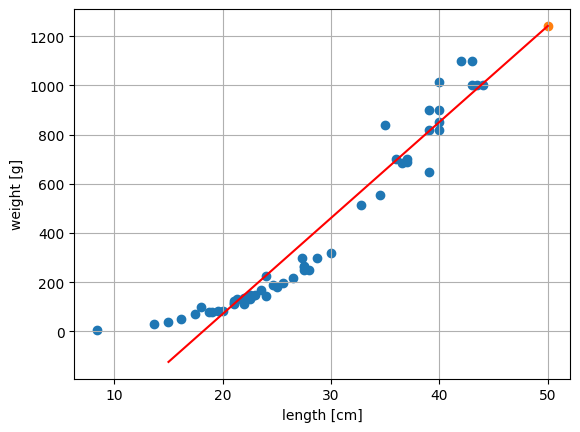

In [35]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(perch_length, perch_weight)  # ([x좌표], [y좌표])

plt.plot([15,50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_], c='red')

plt.scatter(50, y_pred) # 현재 y_pred는 x 좌표가 50일 때의 예측값으로 고정되어있다.

plt.xlabel('length [cm]')
plt.ylabel('weight [g]')
plt.grid(True)
plt.show()

In [36]:
# 결정계수 확인해보기
result = lr.score(x_test, y_test) 
print('R^2 =', result)

R^2 = 0.8247503123313559


> #### Metrics 평가지표
- MAE = 평균 절댓값 오차
- MSE = 평균 제곱 오차
- Root MAE (RMAE) = 평균 절댓값 오차의 루트
- Root MSE (RMSE) = 평균 제곱 오차의 루트

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import root_mean_squared_error

y_pred = lr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print('MAE =', mae) 
print('MSE =', mse)
print('RMSE =', rmse)


MAE = 94.4612293798558
MSE = 17590.26597788918
RMSE = 132.6283000640858


> #### 과대적합(Overfitting) and 과소적합(Underfitting)

In [38]:
# 과소적합
print('학습용 데이터 세트:', lr.score(x_train, y_train))
print('시험용 데이터 세트:', lr.score(x_test, y_test))

학습용 데이터 세트: 0.9398463339976041
시험용 데이터 세트: 0.8247503123313559


In [39]:
# 결과에 음수값이 나옴. 불가능한 일임
print('예측결과', y_pred)

예측결과 [-381.27462726   -6.71003561  363.95284155  122.04654277  168.86711673
  851.66715359  461.49570396  250.80312115  812.65000863  110.34139928
  988.22716096  -76.94089654  383.46141403  356.14941255]


### Chapter 04. 다항 회귀

 - 파이썬 제곱법 : a ** 2

In [40]:
print(x_train ** 2)

[[ 384.16]
 [ 484.  ]
 [ 349.69]
 [ 302.76]
 [1296.  ]
 [ 625.  ]
 [1600.  ]
 [1521.  ]
 [1849.  ]
 [ 484.  ]
 [ 400.  ]
 [ 484.  ]
 [ 576.  ]
 [ 756.25]
 [1849.  ]
 [1600.  ]
 [ 576.  ]
 [ 441.  ]
 [ 756.25]
 [1600.  ]
 [1075.84]
 [ 702.25]
 [1332.25]
 [ 187.69]
 [ 515.29]
 [ 225.  ]
 [1369.  ]
 [1225.  ]
 [ 823.69]
 [ 552.25]
 [1521.  ]
 [ 441.  ]
 [ 529.  ]
 [ 484.  ]
 [1936.  ]
 [ 506.25]
 [ 361.  ]
 [1369.  ]
 [ 484.  ]
 [ 655.36]
 [1764.  ]
 [1190.25]]


#### 길이를 제곱하여 왼쪽 열에 추가해준다.
- 곡선의 형태를 만들기 위함.

In [41]:
# poly : 다항식
x_train_poly = np.column_stack((x_train ** 2, x_train))
print(x_train_poly.shape)

(42, 2)


In [42]:
x_test_poly = np.column_stack((x_test ** 2, x_test))
print(x_test_poly.shape)

(14, 2)


In [46]:
lr = LinearRegression()

lr.fit(x_train_poly, y_train) 
y_pred = lr.predict([[50 ** 2, 50]])
print('길이가 50cm인 농어의 무게 예측값 :', y_pred)

길이가 50cm인 농어의 무게 예측값 : [1573.98423528]


> y = ax^2 + bx + c
- a, b ---> coefficients --> coef_
- c --> y-intercept --> intercept_

In [51]:
print("a = ", lr.coef_[0])
print("b = ", lr.coef_[1])
print("c =", lr.intercept_)

a = lr.coef_[0]
b = lr.coef_[1]
c = lr.intercept_

a =  1.0143321093767304
b =  -21.557924978837352
c = 116.05021078278247


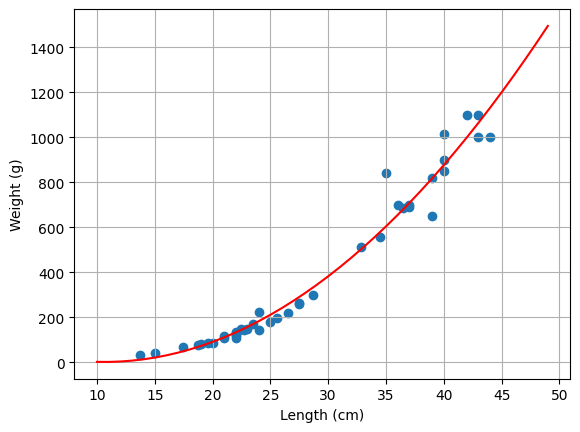

In [63]:
plt.figure()

point_x = np.arange(10, 50, 1) # (시작, 끝-1, 간격)
point_y = a * point_x ** 2 + b * point_x + c # y = ax^2 + bx + c

plt.scatter(x_train, y_train)
plt.plot(point_x, point_y, c='red')

plt.xlabel("Length (cm)")
plt.ylabel("Weight (g)")
plt.grid(True)
plt.show()

In [64]:
# 단순 선형 회귀 모델의 성능
# 학습용 데이터 세트: 0.9398463339976041
# 시험용 데이터 세트: 0.8247503123313559

# 다항 회귀 모델의 성능
print('학습용 데이터 세트:', lr.score(x_train_poly, y_train))
print('시험용 데이터 세트:', lr.score(x_test_poly, y_test))

학습용 데이터 세트: 0.9706807451768623
시험용 데이터 세트: 0.9775935108325121


#### - 두 모델 모두 과소적합이 발생했다. <br>
> 단순 선형 회귀 모델   
> ➡️ case 1) 둘 다 점수가 높지 않음. <br>
>   
> 다항 회귀 모델   
> ➡️ case 2) 테스트용 모델이 학습용 모델보다 점수가 높음.